In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from pandas import value_counts

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()
(df==0).sum()

age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         258
restecg     147
thalach       0
exang       204
oldpeak      99
slope        21
ca          175
thal          2
target      138
dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


target
1    165
0    138
Name: count, dtype: int64


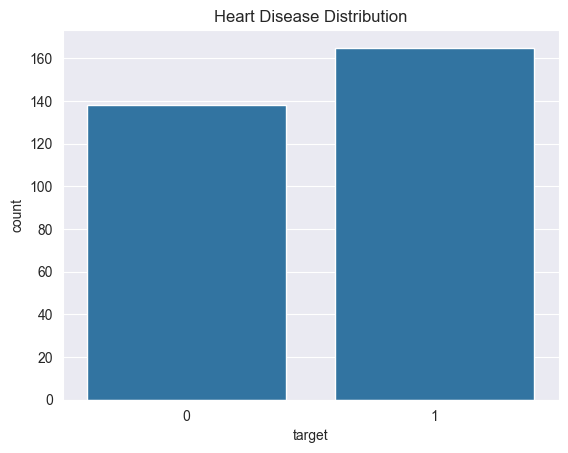

In [8]:
print(df['target'].value_counts())  # check class balance
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

<Axes: xlabel='target', ylabel='sex'>

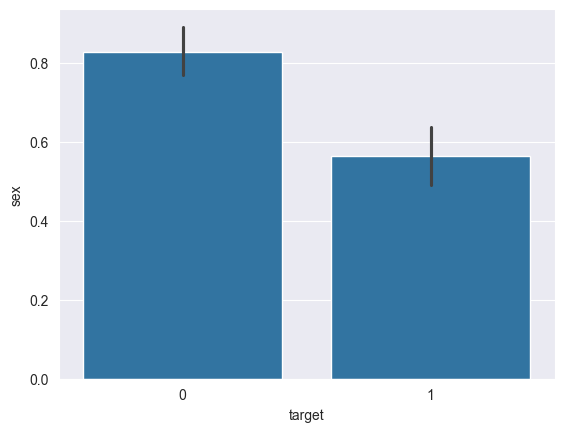

In [9]:
sns.barplot(x='target', y='sex', data=df)

<Axes: xlabel='target', ylabel='age'>

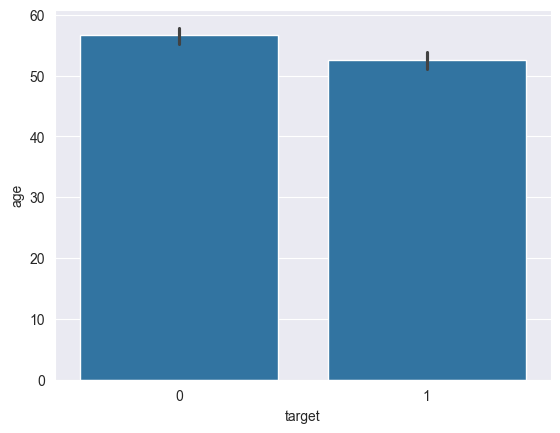

In [10]:
sns.barplot(x='target', y='age', data=df)

In [14]:
(df['age'] > 60).value_counts()


age
False    224
True      79
Name: count, dtype: int64

In [15]:
(df['age'] > 50).value_counts()

age
True     208
False     95
Name: count, dtype: int64

In [16]:
(df['age'] > 65).value_counts()

age
False    270
True      33
Name: count, dtype: int64

In [17]:
(df['age'] > 70).value_counts()

age
False    297
True       6
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='age'>

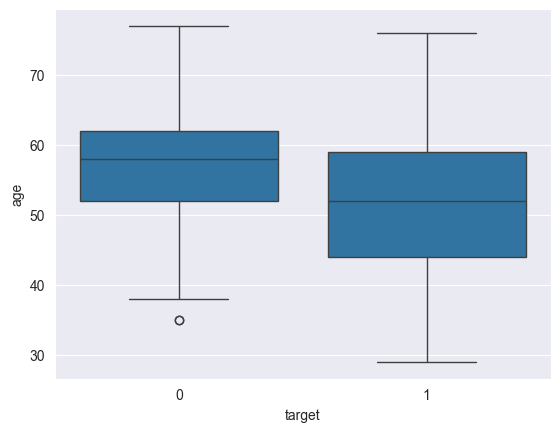

In [22]:
sns.boxplot(x='target',y='age', data=df)

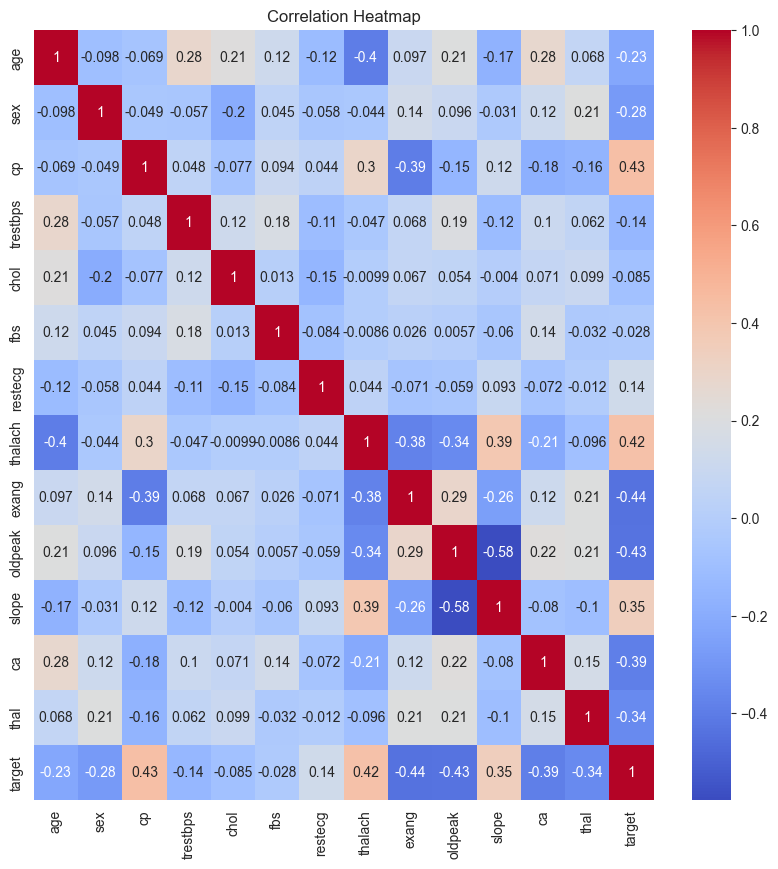

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Applying linear regression

we cannot apply linear regression because our target variable is 0 or 1 which is classification problem but for paratice i apply linear regression on it and check accuracy

In [27]:
X = df.drop('target', axis=1)
y = df['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [31]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [33]:
y_pred=lr.predict(X_test)
y_pred

array([ 0.20461609,  0.62932079,  0.71803669,  0.04394647,  0.93859572,
        0.82919673,  0.55248505, -0.31123783, -0.12686594,  0.50190798,
        0.67329639,  0.22858348,  0.83576074,  0.10160178,  1.1070706 ,
        0.90376346,  1.08827421,  0.21347573, -0.14247183, -0.02892816,
        0.60715419, -0.05665451,  0.35685167,  0.68434807,  0.88713565,
        0.60700687,  0.81935794,  0.53123747, -0.10013016,  0.8970951 ,
        0.05884203,  0.07332101, -0.14826886,  0.24195448,  0.69307817,
        0.19714348,  0.66820272,  0.77828265,  0.68233201,  0.75469071,
        0.49240619,  0.64012072,  0.75759582,  0.67302635,  0.74556992,
       -0.1916457 ,  0.66356747,  0.91773248,  0.22766617, -0.00575935,
        0.15521194, -0.13222102,  0.78206754,  1.04130301,  0.33798087,
       -0.2796243 ,  0.11850097,  0.94519132,  0.01120021, -0.218084  ,
        0.15742582])

In [35]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

mae=mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(' Mean Absolute Error: ',mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


 Mean Absolute Error:  0.2668368016900795
Mean Squared Error: 0.11627071992880013
R² Score: 0.5337894947682487


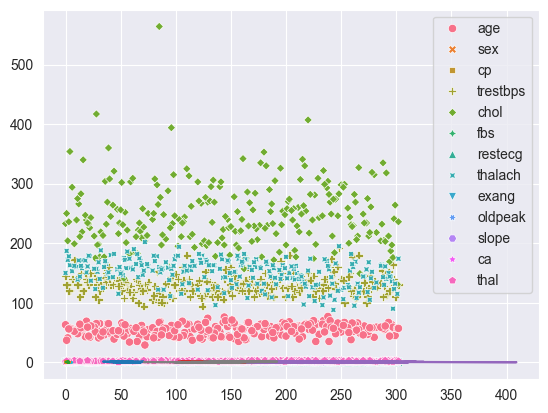

In [43]:
sns.scatterplot(X_train)
plt.plot(X_test, y_pred)
plt.show()



# Now apply polynomial linear regression only for the purpose of practice because target variable is cetagorical not numeric

In [44]:
X = df.drop('target', axis=1)
y = df['target']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create Polynomial Features

In [48]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train Linear Regression on Polynomial Data

In [49]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.20427240181303968
R² Score: 0.18092930264405105


# Visualize Actual vs Predicted

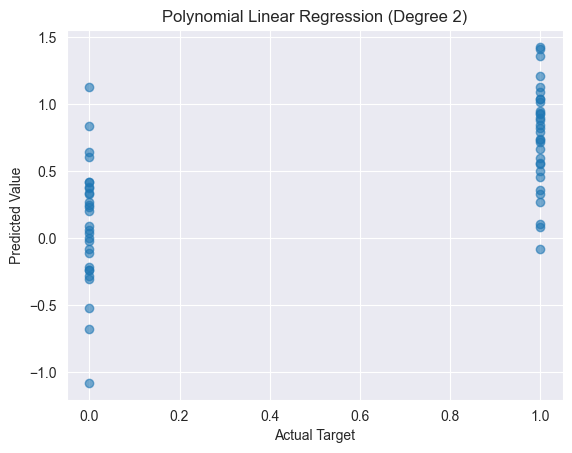

In [51]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Value")
plt.title("Polynomial Linear Regression (Degree 2)")
plt.show()
